## 1. Basic Data Exploration and Pandas Operations

#### Exercise 1: Load and Inspect the Data

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import chi2, chi2_contingency

In [ ]:
# Load the dataset
df = pd.read_csv('results.csv')

# Display the first 10 rows
df.head(5)

In [ ]:
# Display the last 5 rows
df.tail(5)

#### Exercise 2: Data Summary and Statistics

In [ ]:
# Summary of the dataset
df.info()

In [ ]:
# Basic statistics
df.describe()

## 2. Data Cleaning and Manipulation

### Exercise 3: Add New Columns

In [ ]:
# Add a new column for total goals
df['total_goals'] = df['home_score'] + df['away_score']

### Exercise 4: Filter and Sort Data - Games that ended in a Draw

In [ ]:
# Filter matches that ended in a draw
draws = df[df['home_score'] == df['away_score']]
draws.head()

In [ ]:
# Sort by date
draws_sorted = draws.sort_values(by='date')

# Group by the home_score and away_score to count the occurrences of each score combination
draw_scores = draws_sorted.groupby(['home_score', 'away_score']).size()

# Sort the counts in descending order to find the most common score
draw_scores_sorted = draw_scores.sort_values(ascending=False)

# Display the most common draw score and its count
most_common_draw_score = draw_scores_sorted.head()
print("Most common draw score:\n", most_common_draw_score)

## 3. Grouping, Aggregation and Visualisation

### Exercise 5: Common WC/Euros Matchups

In [ ]:
matchups = df.groupby(['home_team', 'away_team']).size().sort_values(ascending=False)
print(matchups.head(10))

### Exercise 6: Mean Goals by Tournament

In [ ]:
# Group by tournament and calculate the average goals
avg_goals_tournament = df.groupby('tournament')['total_goals'].mean()
print(avg_goals_tournament)

### Exercise 7: Mean Goals Over Time

In [ ]:
# Convert date to datetime format
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# Calculate average goals per match per year
df['year'] = df['date'].dt.year
avg_goals_by_tournament_year = df.groupby(['year', 'tournament'])['total_goals'].mean().reset_index().rename(columns={"total_goals":"mean_goals"})
avg_goals_by_tournament_year.head()

Some very high mean goals there - lets get more context

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_goals_by_tournament_year, x='year', y='mean_goals', hue='tournament', marker='o')
plt.title('Average Goals Per Match Over Time by Tournament')
plt.xlabel('Year')
plt.ylabel('Average Goals Per Match')
plt.legend(title='Tournament', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

Some spikey averages, but it starts to normalise - lets check why

In [ ]:
matches_per_year_tournament = df.groupby(['year', 'tournament']).size().reset_index(name='match_count')

In [ ]:
# Set the plot size
plt.figure(figsize=(10, 6))

# Plot the data using a bar plot
sns.barplot(data=matches_per_year_tournament, x='year', y='match_count', hue='tournament')

# Customize the plot
plt.title('Number of Matches Per Year Per Tournament')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.legend(title='Tournament', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

The more games played, the more the average starts to stabalise - with such few games, it was likely that the average goals scored was quite volatile

### Exercise 8: Goals Distribution

In [ ]:
# Plot the distribution of total goals
plt.figure(figsize=(10, 6))
sns.histplot(df['total_goals'], bins=50)
plt.title('Distribution of Total Goals Scored in Matches')
plt.xlabel('Total Goals')
plt.ylabel('Frequency')
plt.show()

## 4: Penalties :(

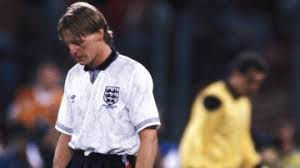

We'll take a look at a penatlty shootout dataset, Euros/WC since 1990

#### Exercise 9: Load and Explore the Dataset

In [ ]:
# Load the dataset
shootouts_df = pd.read_csv('shootouts.csv')

# Display the first few rows of the dataset
shootouts_df.head()

In [ ]:
# Display the last few rows of the dataset
shootouts_df.tail()

In [ ]:
# Print some basic info about the dataset
shootouts_df.info()

#### Exercise 10: Is there an advantage to taking the first penalty?

In [ ]:
# First shooter wins
first_wins = shootouts_df[shootouts_df['first_shooter'] == shootouts_df['winner']].shape[0]

# Second shooter wins
second_wins = shootouts_df[shootouts_df['first_shooter'] != shootouts_df['winner']].shape[0]

# Total shootouts
total_shootouts = shootouts_df.shape[0]

# Calculate win rates
win_rate_first_shooter = first_wins / total_shootouts
win_rate_second_shooter = second_wins / total_shootouts

# Display the win rates
print(f"Win rate for the first shooter: {win_rate_first_shooter:.2%}")
print(f"Win rate for the second shooter: {win_rate_second_shooter:.2%}")

Yes, there appears to be an advantage unless you are England.

#### Exercise 11: Who has the best record in shootouts?

In [ ]:
# Calculate the total number of shootouts each team participated in
home_shootouts = shootouts_df['home_team'].value_counts()
away_shootouts = shootouts_df['away_team'].value_counts()

# Combine both home and away shootouts for total shootouts per team
total_shootouts = home_shootouts.add(away_shootouts, fill_value=0)

# Calculate the number of wins for each team
win_counts = shootouts_df['winner'].value_counts()

In [ ]:
# Combine both total shootouts and win counts into a DataFrame
records = pd.DataFrame({
    'total_shootouts': total_shootouts,
    'wins': win_counts
}).fillna(0)  # Fill NaN values with 0

# Calculate the win rate for each team
records['win_rate'] = records['wins'] / records['total_shootouts']

In [ ]:
# Filter the dataset to teams that have been in at least 4 shootouts, sorted by win rate
records[records['total_shootouts']>3].sort_values('win_rate', ascending=False) 

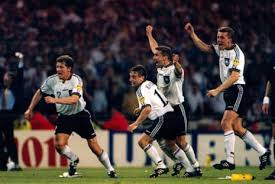

#### Appendix - Chi-Square Test

Is there a statistically significant association between being the first shooter and winning the shootout?

In [ ]:
# Create a column to indicate if the first shooter won the shootout
shootouts_df['first_shooter_wins'] = shootouts_df['first_shooter'] == shootouts_df['winner']

# Count the number of wins and losses for the first and second shooters
first_wins = shootouts_df['first_shooter_wins'].sum()
first_losses = len(shootouts_df) - first_wins

# Construct the contingency table
contingency_table = pd.DataFrame({
    'Outcome': ['Win', 'Lose'],
    'First Shooter': [first_wins, first_losses],
    'Second Shooter': [first_losses, first_wins]
})

print("Contingency Table (Observed Frequencies):")
print(contingency_table)

In [ ]:
# Prepare the contingency table for chi2_contingency
observed_frequencies = contingency_table[['First Shooter', 'Second Shooter']].values

# Perform the chi-square test using chi2_contingency
chi2_stat, p_value, dof, expected_frequencies = chi2_contingency(observed_frequencies)

print(f"\nChi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected_frequencies)

# Interpretation
significance_level = 0.05
if p_value < significance_level:
    print("Reject the null hypothesis: There is a significant association between being the first shooter and winning the shootout.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between being the first shooter and winning the shootout.")


The high p-value of 0.8415 indicates that there is no statistically significant association between being the first shooter and winning the shootout, based on the data observed. In other words, the observed data does not provide enough evidence to reject the null hypothesis, which assumes that being the first shooter does not affect the outcome of winning the shootout.

If more data were collected:

- Increased Statistical Power: With more data points, the chi-square test could potentially detect smaller deviations from expected frequencies.
- Decreased P-Value: If being the first shooter truly has an effect (either positive or negative) on winning the shootout, more data could provide stronger evidence of this effect. This could potentially lead to a lower p-value, indicating a significant association between being the first shooter and winning.